# Обобщённые линейные модели.  Пуассоновская регрессия

------

Модель пуассоновской регрессии стоит рассмотреть в случае, когда целевая переменная имеет счётные положительные значения. Конечно, такие ограничения целевой переменной не говорят о том, что она она получена из пуассоновского распределения, однако часто при таком моделировании результат оказывается лучше, чем при описании моделью линейной регрессии.

In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим задачу прогнозирования количества велосипедистов в зависимости от ожидаемых погодных условий. Очевидно, чем хуже погода, тем меньше желающих кататься на велосипеде в рассматриваемый день. В качестве признаков возьмем:
- максимальную температуру в рассматриваемый день (F);
- минимальную температуру в рассматриваемый день (F);
- количество осадков.

Целевая переменная `'BB_COUNT'` содержит только целые положительные числа, что должно быть учтено при выборе предсказательной модели.

In [77]:
bicyclist_data = pd.read_csv(
    'data/nyc_bicyclist_counts.csv', 
    index_col='Date', 
    parse_dates=True
)

C:\Users\HokoriDynasty\AppData\Local\Temp\ipykernel_2360\3017416777.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bicyclist_data = pd.read_csv(


In [78]:
bicyclist_data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


Посмотрим на гистограмму распределения целевой переменной. Сложно судить о том, из какого распределения могла быть получена данная выборка. Попробуем построить линейную и пуассоновскую регрессии.

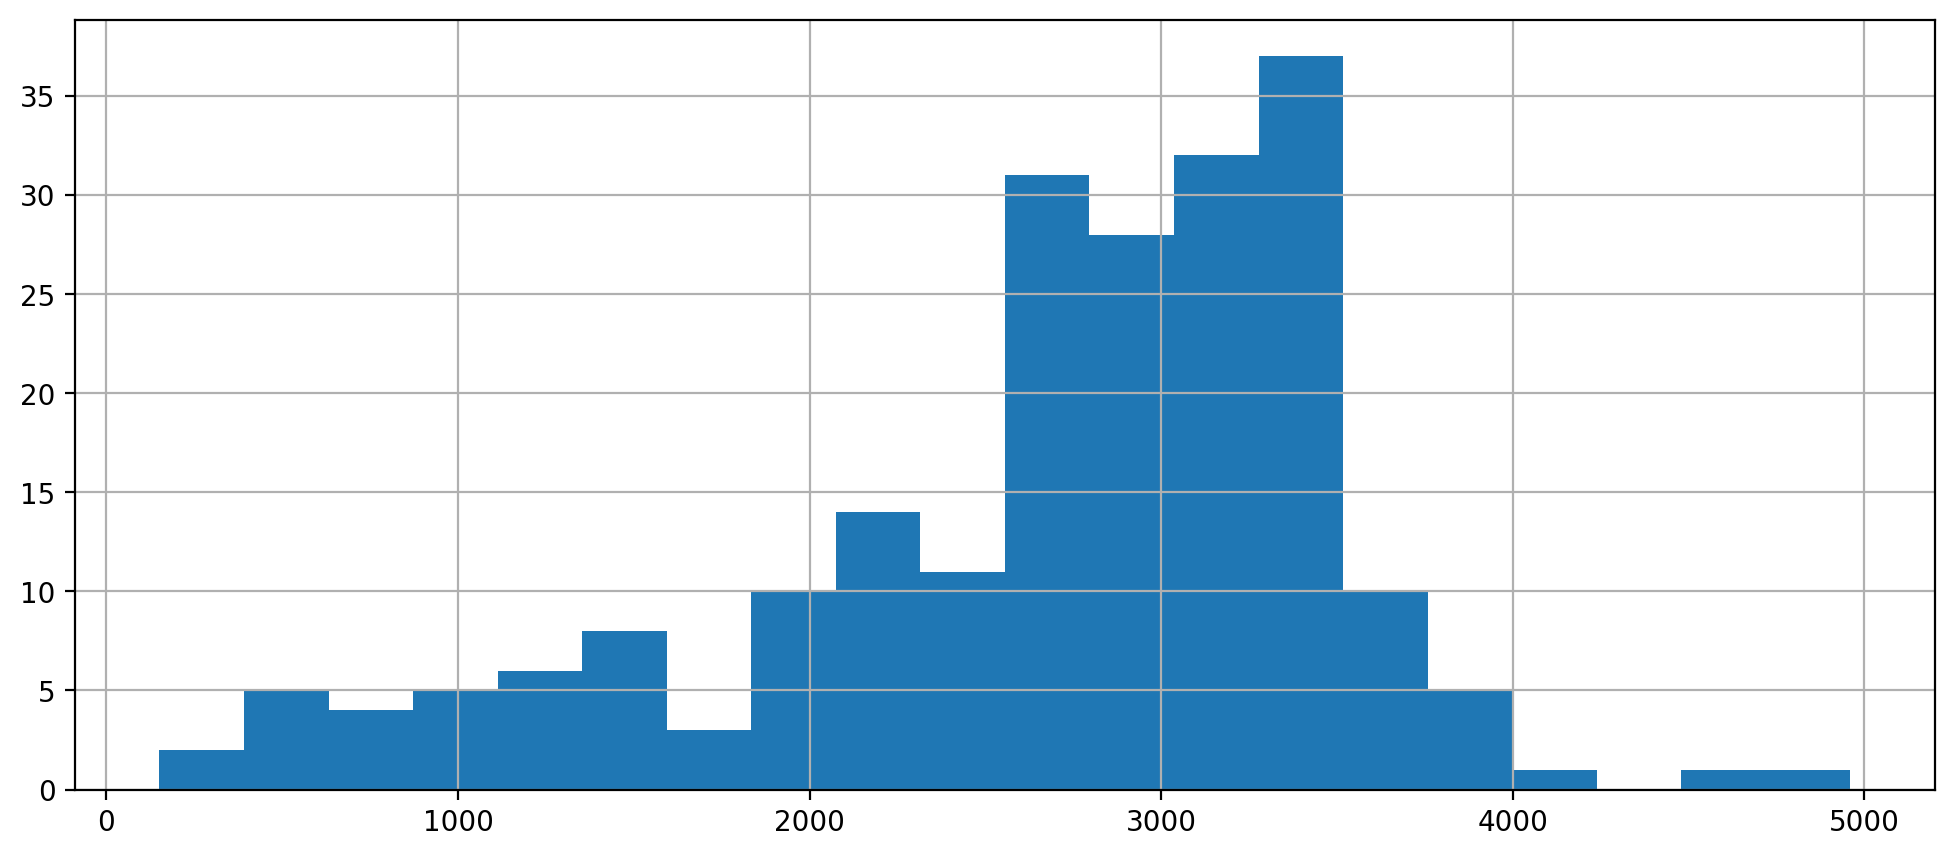

In [79]:
plt.figure(figsize=(12, 5), dpi=200)
bicyclist_data['BB_COUNT'].hist(bins=20)
plt.show()

Количество велосипедистов может зависеть не только от погодных условий, но и от дня недели: в выходные количество желающих больше, нежели в будни. Кроме того, важным может оказаться месяц наблюдения, чтобы учесть годовую сезонность.

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
1.  Добавьте столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение. Также добавьте столбец, состоящий из единичек, поскольку функция GLM из statsmodels может не учесть свободный член при функциях связи, отличных от гауссовской.
<p></p>
2. Обучите линейную и пуассоновскую регрессии из statsmodels (функция связи &ndash; statsmodels.genmod.families.family.Poisson). Сравните качество аппроксимации (то есть, без разбиения на обучение и контроль!) с помощью среднеквадратичной ошибки (MSE).
<p></p>
</div>

### 1. Добавьте столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение. Также добавьте столбец, состоящий из единичек, поскольку функция GLM из statsmodels может не учесть свободный член при функциях связи, отличных от гауссовской.

In [80]:
# способы извлечь месяц и день недели
# bicyclist_data.index.month
# bicyclist_data.index.dayofweek

In [81]:
bicyclist_data['day_of_week'] = bicyclist_data.index.dayofweek
bicyclist_data['month'] = bicyclist_data.index.month
bicyclist_data['units'] = 1

In [82]:
bicyclist_data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,day_of_week,month,units
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,5,4,1
2017-04-02,62.1,41.0,0.00,2021,6,4,1
2017-04-03,63.0,50.0,0.03,2470,0,4,1
2017-04-04,51.1,46.0,1.18,723,1,4,1
2017-04-05,63.0,46.0,0.00,2807,2,4,1


### 2. Обучите линейную и пуассоновскую регрессии из statsmodels (функция связи – statsmodels.genmod.families.family.Poisson). Сравните качество аппроксимации (то есть, без разбиения на обучение и контроль!) с помощью среднеквадратичной ошибки (MSE).

In [83]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [84]:
X = bicyclist_data[['HIGH_T', 'LOW_T', 'PRECIP', 'day_of_week', 'month', 'units']]
y = bicyclist_data['BB_COUNT']

In [85]:
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
y_pred = model.predict(X)
mean_squared_error(y, y_pred)

295843.78384084307

In [86]:
model_linear = sm.OLS(y, X).fit()
y_pred_linear = model_linear.predict(X)
mean_squared_error(y, y_pred_linear)

322765.4642703828

Пуассоновская регрессия показывает результаты лучше, чем линейная 

Пуассоновскую регрессию в sklearn можно также найти в модуле `linear_model`.

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
Попробуйте обучить линейную и пуассоновскую регрессии из sklearn на данных о количестве велосипедистов. Сравните качество аппроксимации с помощью среднеквадратичной ошибки (MSE). При инициализации PoissonRegressor из sklearn укажите значение опции alpha=0 (параметр регуляризации).
<p></p>
</div>

In [87]:
from sklearn.linear_model import PoissonRegressor,LinearRegression
from sklearn.preprocessing import StandardScaler

In [88]:
X = bicyclist_data[['HIGH_T', 'LOW_T', 'PRECIP', 'day_of_week', 'month']]
y = bicyclist_data['BB_COUNT']

In [89]:
model_sklearn = PoissonRegressor(alpha=0)
model_sklearn.fit(X, y)
mean_squared_error(y, model_sklearn.predict(X))

295843.78284366813

In [90]:
model_linear_sklearn = LinearRegression()
model_linear_sklearn.fit(X, y)
mean_squared_error(y, model_linear_sklearn.predict(X))

322765.4642703828

Во втором задании sklearn имеет аналогичные результаты